In [1]:
cd ../../

/home/michael/Dropbox/PhD/Python/unified_model


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unified_model.electrical_system.flux.utils import FluxDatabase
from unified_model.electrical_system.flux.model import flux_interpolate
from unified_model.electrical_system.electrical_system import OpenCircuitSystem

In [4]:
fdb = FluxDatabase('../Research/fea-flux-curves-numr[1-20-600]-numz[1-20-600]-wdiam[0.127]-2018-03-24[10.45.22].csv', fixed_velocity=0.35)

In [4]:
from scipy.interpolate import interp1d
def flux_interpolator(z_arr, phi_arr, coil_center):
    z_arr = z_arr - z_arr[np.abs(phi_arr).argmax()] + coil_center
    interpolator = interp1d(z_arr, phi_arr, fill_value=0, bounds_error=False)
    return interpolator

In [6]:
phi = fdb.query(winding_num_r='61', winding_num_z='61')
z_arr = np.linspace(-0.5, 0.5, len(phi)) 
t_arr = np.arange(0, len(z_arr)*0.01, 0.01)

In [7]:
oc = OpenCircuitSystem(z_index=z_arr, phi_arr=phi, flux_model=flux_interpolate, coil_center = 0)

In [8]:
out = []
for t, z in zip(t_arr, z_arr):
    out.append(oc.get_emf(t, z))

/home/michael/Dropbox/PhD/Python/unified_model/unified_model/electrical_system/model.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  dz_dt = delta_z / delta_t


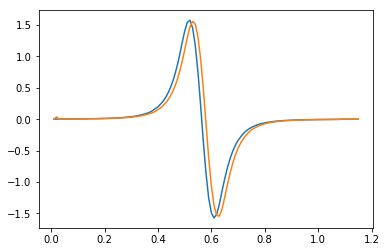

In [11]:
plt.plot(t_arr[1:], -dphi)
plt.plot(t_arr, out)